## 2 Line Search

### Consider the function f(x) = x^4 and the initial point x_0 = 1.

#### Question 3 (4 Points). Implement steepest descent with learning rate 0.1 and 0.01. Plot how the function values change in the first 100 iterations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x**4

def df(x):
    return 4*x**3

In [3]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,50)

# the function y = x^4 
y = f(x)
dy = df(x)

In [4]:
len(y)

50

In [5]:
len(dy)

50

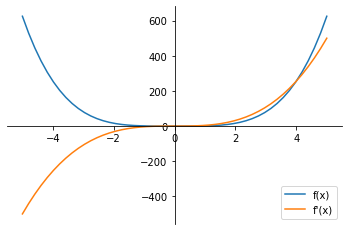

In [6]:
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x,y, label="f(x)")
plt.plot(x,dy,label="f'(x)")
plt.legend()
plt.show()

In [7]:
def steepest_descent(x0, rate):
    cur_x = x0
    max_iters = 120 # maximum number of iterations
    iters = 1 #iteration counter
    value_change = []
    value_change.append(f(cur_x))
    while iters < max_iters:
        prev_x = cur_x #current x value in prev_x
        cur_x = cur_x - rate * df(prev_x) #Grad descent
        value_change.append(f(cur_x))
        #print("Iteration",iters,"\nX value is",cur_x) #Print iterations
        iters = iters + 1 #iteration count

    return value_change, cur_x


<Figure size 432x288 with 0 Axes>

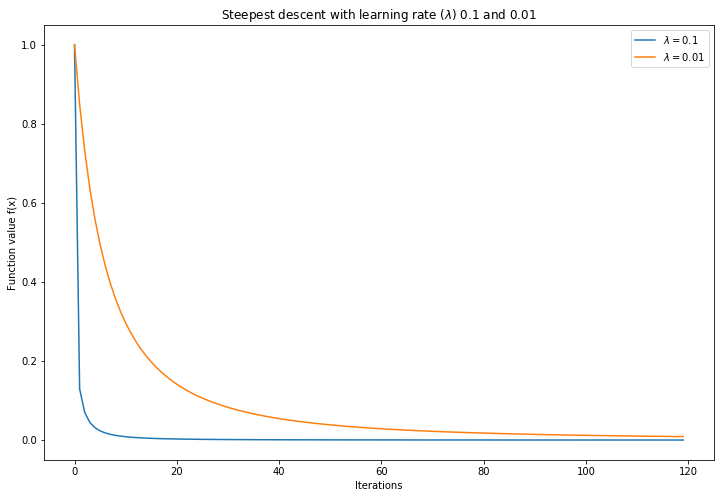

In [8]:
value_change_1, opt_x1 = steepest_descent(1,0.1)
value_change_2, opt_x2 = steepest_descent(1,0.01)
fig_iter = plt.figure()
plt.figure(figsize=(12,8))
plt.plot(value_change_1, label="$\lambda={}$".format(0.1))
plt.plot(value_change_2, label="$\lambda={}$".format(0.01))
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Function value f(x)")
plt.title("Steepest descent with learning rate ($\lambda$) 0.1 and 0.01")
plt.show()

In [9]:
steps = [f(1 - rate * df(1) * 0.01) for rate in range(1,101)]
#steps

In [10]:
temp = [f(1 - rate * df(1) * 0.1) for rate in range(1,10)]
#temp

In [11]:
opt_rate = np.argmin(steps)
#opt_rate

In [12]:
opt_rate = np.argmin(temp)
#opt_rate

#### Question 4 (6 Points). How would you compute the optimal step size in each iteration? First give the mathematical derivation. Then implement that procedure and plot how the function values change in the first 100 iterations (copy the previous plot and add one more curve).

In [13]:
def steepest_descent_adaptive_step_size(x0):
    cur_x = x0
    max_iters = 120 # maximum number of iterations
    iters = 1 #iteration counter
    value_change = []
    value_change.append(f(cur_x))
    while iters < max_iters:
        prev_x = cur_x #current x value in prev_x
        steps = [f(cur_x - rate * df(prev_x) * 0.01) for rate in range(1, 101)]
        opt_rate = (np.argmin(steps) + 1) * 0.01
        cur_x = cur_x - opt_rate * df(prev_x) #Grad descent
        value_change.append(f(cur_x))
        #print("Iteration",iters,"\nX value is",cur_x) #Print iterations
        iters = iters + 1 #iteration count

    return value_change, cur_x

In [14]:
value_change, opt_x = steepest_descent_adaptive_step_size(1)

<Figure size 432x288 with 0 Axes>

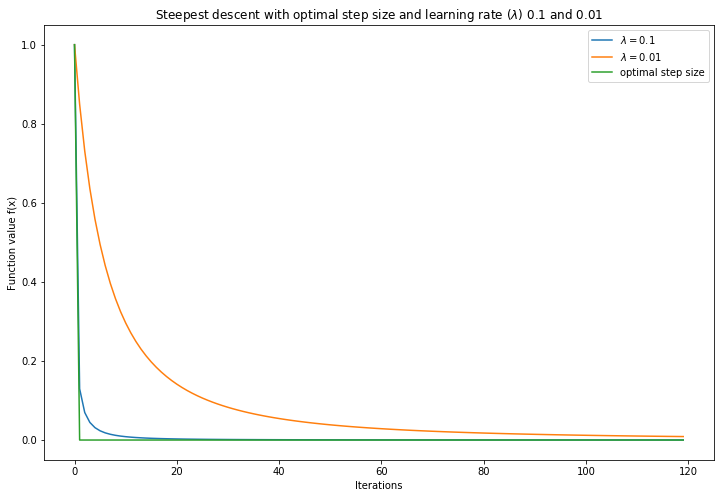

In [15]:
value_change_1, opt_x1 = steepest_descent(1,0.1)
value_change_2, opt_x2 = steepest_descent(1,0.01)

fig_iter = plt.figure()
plt.figure(figsize=(12,8))
plt.plot(value_change_1, label="$\lambda={}$".format(0.1))
plt.plot(value_change_2, label="$\lambda={}$".format(0.01))
plt.plot(value_change, label="optimal step size")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Function value f(x)")
plt.title("Steepest descent with optimal step size and learning rate ($\lambda$) 0.1 and 0.01")
plt.show()


#### Question 5 (4 Points). Implement the Newton direction. Compare step size 1 with two other choices of step sizes of your choice. Plot the first 100 iterations (copy the previous plot and add more curves).

In [16]:
def d2f(x):
    return 12*x**2

In [17]:
def Newton_direction(x0, step_size):
    cur_x = x0
    max_iters = 120 # maximum number of iterations
    iters = 1 #iteration counter
    value_change = []
    value_change.append(f(cur_x))
    while iters < max_iters:
        prev_x = cur_x #current x value in prev_x
        cur_x = cur_x - step_size * df(prev_x) / d2f(prev_x)
        value_change.append(f(cur_x))
        #print("Iteration",iters,"\nX value is",cur_x) #Print iterations
        iters = iters + 1 #iteration count

    return value_change, cur_x

In [18]:
value_change_new_1, opt_x_new_1 =  Newton_direction(1,1)
value_change_new_2, opt_x_new_2 =  Newton_direction(1,0.1)
value_change_new_3, opt_x_new_3 =  Newton_direction(1,0.01)

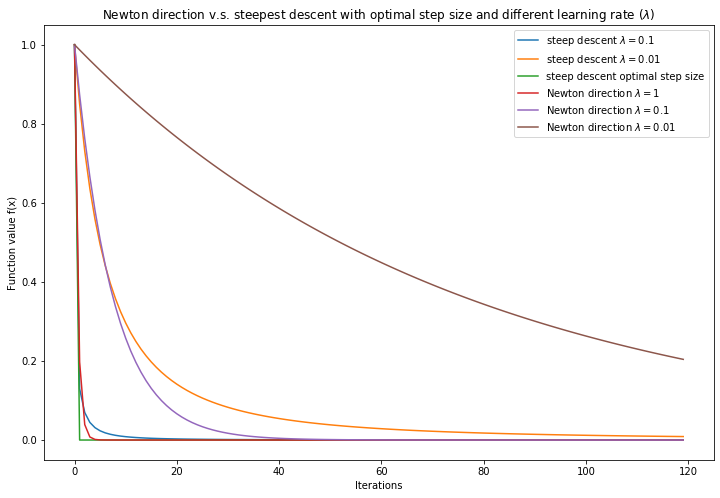

In [19]:
plt.figure(figsize=(12,8))
plt.plot(value_change_1, label="steep descent $\lambda={}$".format(0.1))
plt.plot(value_change_2, label="steep descent $\lambda={}$".format(0.01))
plt.plot(value_change, label="steep descent optimal step size")
plt.plot(value_change_new_1, label="Newton direction $\lambda={}$".format(1))
plt.plot(value_change_new_2, label="Newton direction $\lambda={}$".format(0.1))
plt.plot(value_change_new_3, label="Newton direction $\lambda={}$".format(0.01))
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Function value f(x)")
plt.title("Newton direction v.s. steepest descent with optimal step size and different learning rate ($\lambda$)")
plt.show()